<a href="https://colab.research.google.com/github/LambdaTheda/DS-Unit-2-Linear-Models/blob/master/Sat_Mar_14_build_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **LOAD DATASETS**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# read in dataset 1: pokemon Go character sightings

import pandas as pd

df = pd.read_csv('/content/drive/My Drive/predictemall/300k.csv')

#df = pd.read_csv('300k.csv')
pd.set_option("display.max_rows", 91835)
pd.set_option("display.max_columns", 300)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
import pandas as pd

# read in dataset 2: encoded names and corresponding id#s
df_Names = pd.read_csv('/content/drive/My Drive/predictemall/pokemonNumbers.csv', header= None) #RT CLK ON FILE TO PUT PATH HERE OK
pd.set_option("display.max_rows", 91835)
df_Names.columns=['pokemonId', 'pokemonName'] # change df_Names column names to align with the proper columns for merge.

df_Names

### **EXPLORATORY DATA ANALYSES AND WRANGLING/MUNGING/CLEANING**

In [0]:
df.head()

In [0]:
df.shape

(296021, 208)

In [0]:
df.sample(100)

,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,cellId_2920m,cellId_5850m,appearedTimeOfDay,appearedHour,appearedMinute,appearedDayOfWeek,appearedDay,appearedMonth,appearedYear,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,windBearing,pressure,weatherIcon,sunriseMinutesMidnight,sunriseHour,sunriseMinute,sunriseMinutesSince,sunsetMinutesMidnight,sunsetHour,sunsetMinute,sunsetMinutesBefore,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
101055,48,52.520067,13.373520,2016-09-06T01:42:05,MTc2MDg3MTU4Mjc0MTMzMjUzNzM=,5163466854835945500,5163466854903054300,5163466854634618900,5163466853560877100,5163466840675975200,5163466789136367600,5163466857855844400,night,3,42,Saturday,6,8,2016,13,False,Berlin,Europe,Foggy,11.0,3.99,328,1025.06,fog,387,6,27,-160,1184,19,44,957,3622.889600,True,True,True,False,0.526653,False,False,False,True,True,True,0.088248,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,48
206237,98,50.065415,14.421062,2016-09-04T11:53:44,NDY3OTY1MTg0OTI1MTU3NDQxMw==,5119348544897024000,5119348544964132900,5119348544695697400,5119348545769439200,5119348558654341100,5119348610193948700,5119348404035518500,afternoon,13,53,Thursday,4,8,2016,13,False,Prague,Europe,MostlyCloudy,23.0,14.00,251,1011.83,partly-cloudy-day,383,6,23,576,1182,19,42,223,2261.157000,True,True,True,False,0.022676,True,True,True,True,True,True,0.121249,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,Fals

In [0]:
df_Names.head(20)

,pokemonId,pokemonName
0,1,Bulbasaur
1,2,Ivysaur
2,3,Venusaur
3,4,Charmander
4,5,Charmeleon
5,6,Charizard
6,7,Squirtle
7,8,Wartortle
8,9,Blastoise
9,10,Caterpie


In [0]:
df_Names.shape

(150, 2)

In [0]:
#df3 is MERGED DF from df and df_Names
df3 =  pd.merge(df_Names, df, on = 'pokemonId')

import pandas as pd

pd.set_option("display.max_rows", 91835)
# merge df and df_Names to make df3
df3.head()


In [0]:
df3.shape

(296021, 209)

In [0]:
df3.sample(100)

In [0]:
#Choosing'appearedDayOfWeek' as target
df3['appearedDayOfWeek'].nunique()

In [0]:
df3['appearedDayOfWeek'].value_counts()

In [0]:
# check df3 Nulls- returns 0 for all columns
df3.isnull().sum()

In [0]:
#df3.columns.to_list()

#**BUILD PREDICTION MODEL**

In [0]:
# TARGET:
df3['appearedDayOfWeek']

**use correlation matrix and heatmap to help determine which features to include in models**

In [0]:
#For Correlation matrix: setting categories to type 'category' for faster operations
#df['column1'] = df['column1'].astype('category') ?? = typecasting

df3.corr().isnull().sum()

**use df.replace() instead of encoding days of week for caluclating Accuracy Score**

In [0]:
#convert days of week to Floats for computing accuracy
df3['appearedDayOfWeek'].replace('Sunday', 1.0, inplace = True)
df3['appearedDayOfWeek'].replace('dummy_day', 2.0, inplace = True)
df3['appearedDayOfWeek'].replace('Tuesday', 3.0, inplace = True)
df3['appearedDayOfWeek'].replace('Wednesday', 4.0, inplace = True)
df3['appearedDayOfWeek'].replace('Thursday', 5.0, inplace = True)
df3['appearedDayOfWeek'].replace('Friday', 6.0, inplace = True)
df3['appearedDayOfWeek'].replace('Saturday', 7.0, inplace = True)
df3.sample(100)

In [0]:
#View correlation matrix- at the moment only interested in features most Positively or most Negatively correlated with 'appearedDayOfWeek" 
df3.corr()

In [0]:
#Correlation heatmap: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = df3.corr()
f, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(corrmat, vmax=.8, square=True);

In [0]:
#trim df to reduce noise: try Binning


In [0]:
df3['appearedDayOfWeek'].nunique()

7

In [0]:
#Get BASELINE- the first way to get the highest accuracy by assuming majority, [by] assum[ing] majority:

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row', 300000)
'''
average for regression should be the majority value in a sense; 
classification is assuming all values are the highest majority value- BASELINE IS PREDICTING MODE CLASS (largest # of observations
'''

df3['appearedDayOfWeek'].value_counts()
# our BASELINE IS SATURDAY, WITH 72201 appearances on that day

In [0]:
# Fit a Classification model
# Try a shallow decision tree as a fast, first model

#pip install --upgrade category_encoders
# from sklearn.preprocessing import CategoricalEncoder
#pip install category_encoders

!pip install category_encoders==2.* 

import numpy as np
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#encoder = ce.OrdinalEncoder(cols=[...])

target = 'appearedDayOfWeek'
#features = ['appearedMonth', 'appearedYear', 'appearedDay', 'pokestopDistanceKm', 'weather', 'latitude', 'longitude'] #CAUSING LEAKS, 1ST 3 COLS??
features = ['pokestopDistanceKm', 'weather', 'latitude', 'longitude']

'''
#Give 2 parameters pass df to make X and y train from features, then ?...
#df3[features] eg takes 1st 70 rows (for 70-30 split) to make x train of all these  then to 
#y_train of 1st 70 rows take 
#last 30 rows are Xtest and Y_test are y_target (cols); default split size is 75% train, 25 test
'''
#a sklearn fcn to split df3 into test and train sets
X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target])

#train, test = train_test_split(df)- Bruno thought was synonymous with above line

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='most_frequent'),
    RandomForestClassifier() #can add parameters n-folds or k-folds.. tree depth
)


In [0]:
#make y_train #fit model 1: Random Forest Classifier and score accuracy.
'''
Model 1 Test Accuracy: 0.6300570224035889; BEATS Baseline Accuracy: 0.24476393805907629
'''

'\nModel 1 Test Accuracy: 0.6300570224035889; BEATS Baseline Accuracy: 0.24476393805907629\n'

In [0]:

pipeline.fit(X_train, y_train)

#acc_score = pipeline.score(df3[features], df3[target])

#acc_score = pipeline.score(X_test, y_test) #runs pipeline ag X_Test and comps with actuals = y_test

#ra_score = roc_auc_score(test[target], pipeline.predict(test[features]))

print(f'Test Accuracy: {pipeline.score(X_test, y_test)}') # obivates #acc_score = pipeline.score(X_test, y_test) # runs pipeline ag X_Test and comps with actuals = y_test
#bc pipeline does it all

#print(f'Test ROC AUC: {roc_auc_score(y_test, pipeline.predict(X_test))}\n')


Test Accuracy: 0.634043185687647


In [0]:
# fit Random Forest Classifier 2nd time, as above but with ['cellId_180m', 'cellId_370m'] as features
'''
Returns: Test Accuracy: 0.5204848255546848 - much better than 
Model 1 Test Accuracy: 0.6300570224035889; 1st model's features = ['pokestopDistanceKm', 'weather', 'latitude', 'longitude']
(both) BEAT(S) Baseline Accuracy: 0.24476393805907629
'''

target = 'appearedDayOfWeek'
features = ['cellId_180m', 'cellId_370m']

#a sklearn fcn to split df3 into test and train sets
X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target])

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='most_frequent'),
    RandomForestClassifier() #can add parameters n-folds or k-folds.. tree depth
)

pipeline.fit(X_train, y_train)

print(f'Test Accuracy: {pipeline.score(X_test, y_test)}') # obivates #acc_score = pipeline.score(X_test, y_test) # runs pipeline ag X_Test and comps with actuals = y_test


Test Accuracy: 0.5188498229873254


In [0]:
# fit Random Forest Classifier 3RD time, as above but with ['cellId_180m', 'cellId_370m', 'cellId_730m',	'cellId_1460m',	'cellId_2920m'] as features
'''
3rd RFC Model Returns: Test Accuracy: 0.5189173850768857- BEATS Baseline Accuracy: 0.24476393805907629
        Performed a bit WORSE than 1st model's features = ['pokestopDistanceKm', 'weather', 'latitude', 'longitude']
        Model 1 Test Accuracy: 0.6300570224035889
'''

target = 'appearedDayOfWeek'
features = ['cellId_180m', 'cellId_370m', 'cellId_730m','cellId_1460m',	'cellId_2920m']

#a sklearn fcn to split df3 into test and train sets
X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target])

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='most_frequent'),
    RandomForestClassifier() #can add parameters n-folds or k-folds.. tree depth
)

pipeline.fit(X_train, y_train)

print(f'Test Accuracy: {pipeline.score(X_test, y_test)}') # obivates #acc_score = pipeline.score(X_test, y_test) # runs pipeline ag X_Test and comps with actuals = y_test


Test Accuracy: 0.5208631732562224


Notes: 
To get accuracy of Baseline for comparison-  against test set of 30% of rows

i need 30% preds = Saturday for baseline

run a loop iterate over 30% of rows from test set (y_test) against the baseline (hardcode  as 7.0) 
and chk the target val to see if  set =0 before loop,
inside loop, if the acutal val from test set is == baseline add to
 Correct Predictions   (a variable)
   else
     add to inCorrect Predictions 
     
     ie comp actual to predictions




In [0]:
#GET BASELINE (mode of 'appearedDayOfWeek' ) - getting ~25%
df3['appearedDayOfWeek'].value_counts()

In [0]:
CorrPreds=0
InCorrPreds=0

for z in y_test: 
  if z == 7.0:
     CorrPreds+=1
  else:
      InCorrPreds+=1
print(CorrPreds, InCorrPreds)     #18184 Corr preds  55822  incorr; NOW OUR BASELINE ACCURACY = 
print('Baseline Acc is :  ', (CorrPreds/(CorrPreds + InCorrPreds))) 

18082 55924
Baseline Acc is :   0.24433154068589033


# Logistic Regression for Classification Model

In [0]:
# 214._logistic_regression.ipynb   https://colab.research.google.com/drive/1_ruFrbm1isf4VWTBQbkI9bzqh8LwbOwf#scrollTo=K35e_UsqOcV8
from sklearn.model_selection import train_test_split

#train, val = train_test_split(train, random_state=42) -NOT WORK
X_train, X_test, y_train, y_test = train_test_split(df3[features], df3[target])

print(X_train.shape, X_test.shape) # Changed from 11pm SUN Mar 8 build 2.ipynb; LAST W/ED ntbk

#WAS print(train.shape, val.shape)   https://colab.research.google.com/drive/18AbQ4NV9ivrYrkVMZnRIniFb0hdmvpgY#scrollTo=sOdMUOlodXzU&uniqifier=1 


(222015, 206) (74006, 206)


In [0]:
LR_pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='most_frequent'),
    LogisticRegression() #can add parameters n-folds or k-folds.. tree depth
)

In [0]:
#fit LR model

LR_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='most_frequent',
                               verbose=0)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                        

In [0]:
#Score on test set for LR Model
print(f'Test Accuracy: {LR_pipeline.score(X_test, y_test)}') # obivates #acc_score = pipeline.score(X_test, y_test) # runs pipeline ag X_Test and comps with actuals = y_test


Test Accuracy: 0.1079507066994568


# **Visualizations**

In [0]:
#1) see correlation matrix in previous cell

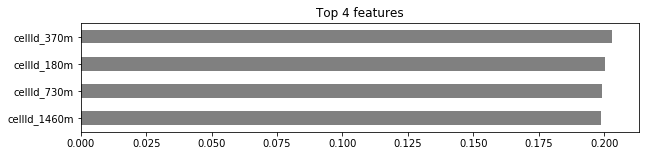

In [0]:
#2) PERMUTATION IMPORTANCES
#   a) just to peek at which features are important to our model, get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot FEATURE IMPORTANCES
%matplotlib inline
import matplotlib.pyplot as plt

n = 4
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
# BEFORE PERMUTING: Sequence of the feature to be permuted: from Features Importance above,
# chose Latitude and Inspection type columns/features to Permute
import numpy as np
for feature in ['cellId_180m', 'cellId_370m']:

# PERMUTE LATITUDE AND INSPECTION TYPE FEATURES
  X_train_permuted = X_train.copy() #copy whole df to submit all at once
  X_train_permuted[feature] = np.random.permutation(X_train[feature])

  X_test_permuted = X_test.copy()
  X_test_permuted[feature] = np.random.permutation(X_test[feature])

  score = pipeline.score(X_test, y_test)
  score_permuted = pipeline.score(X_test_permuted, y_test) #Calc. accuracy on the permuted val dataset

  acc_score = pipeline.score(X_test, y_test)

  print(f'Validation accuracy with {feature}: {score}')
  print(f'Validation accuracy with {feature} permuted: {score_permuted}')
  print(f'Permutation importance: {acc_score - score_permuted}\n')

Validation accuracy with cellId_180m: 0.5282274410182958
Validation accuracy with cellId_180m permuted: 0.4477880171877956
Permutation importance: 0.08043942383050018

Validation accuracy with cellId_370m: 0.5282274410182958
Validation accuracy with cellId_370m permuted: 0.4494635570088912
Permutation importance: 0.0787638840094046



In [0]:
#3) Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
pipeline.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 4
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
#split df3 for val set
#df3['continent'].value_counts()

In [0]:
#2) Shapley Values: SHAP Values (an acronym from SHapley Additive exPlanations) break down a prediction to show the impact of each feature.
# from https://colab.research.google.com/drive/1r2VFMtBAt3sLVIQfsMWyQXt8hB9gziRA#scrollTo=Ep1aBVpVcrDj (FINAL VERSION 234 u2s3m4.ipynb)
'''
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

#try to split val to be 20% of df3? Or try to use test set instead of val
#val = df3[df3['continent']]
X_test = features
y_test = target

X_train_processed = processor.fit_transform(X_train)
X_test_processed = processor.transform(X_test)

eval_set = [(X_train_processed, y_train), 
            (X_test_processed, y_test)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)
          '''

In [0]:
#2) Partial Dependence Plots with 1 feature

# Later, when you save matplotlib images to include in blog posts or web apps,
# increase the dots per inch (double it), so the text isn't so fuzzy
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72


In [0]:
#!pip list 

!pip install PDPbox

from pdpbox.pdp import pdp_isolate, pdp_plot
#from pdpbox.pdp import pdp, pdp_plot

feature = 'latitude'

isolated = pdp_isolate(
    model = RandomForestClassifier,
    dataset=X_train,
    model_features=X_train.columns,
    feature = feature
)


TypeError: ignored

In [0]:
 #3) heat map of latitude, continent, and weather features

'''
X_train = X_train.pivot("latitude", "weather")
ax = sns.heatmap(X_train)
'''
# pandas pivot
heatmap1_data = pd.pivot_table(df3, values='latitude', 
                     index=['continent'], 
                     columns='weather')

sns.heatmap(heatmap1_data, cmap="YlGnBu")

In [0]:
#Try PDP https://colab.research.google.com/drive/1r2VFMtBAt3sLVIQfsMWyQXt8hB9gziRA#scrollTo=k5Tr9d1NcrCu (FINAL VERSION 234 u2s3m4.ipynb)

# chk target distribution/skew; Classes seem MOSTLY balanced Bar graph better for clsfn?
%matplotlib inline
import seaborn as sns
sns.distplot(y_train);

In [0]:
#PDP with Single Feature

target = 'appearedDayOfWeek'
features = df.columns.drop(['cellId_180m', 'cellId_370m'])

X = df3[features]
y = df3[target]

# Use Ordinal Encoder, outside of a pipeline
encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Fit a 2nd RandomForestClassifier, this time with random_state=42, n_jobs=-1 parameters, and
# using cellId_180m', 'cellId_370m' as features to compare (chosen from Corr Heat Map)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
# Fit a 2nd Rand
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y)

In [0]:
# Accuracy of 2nd RandForCls model:  returns Test Accuracy: 0.6418263384049941 
print(f'Test Accuracy: {pipeline.score(X_test, y_test)}') # obivates #acc_score = pipeline.score(X_test, y_test) # runs pipeline ag X_Test and comps with actuals = y_test


Test Accuracy: 0.5282274410182958


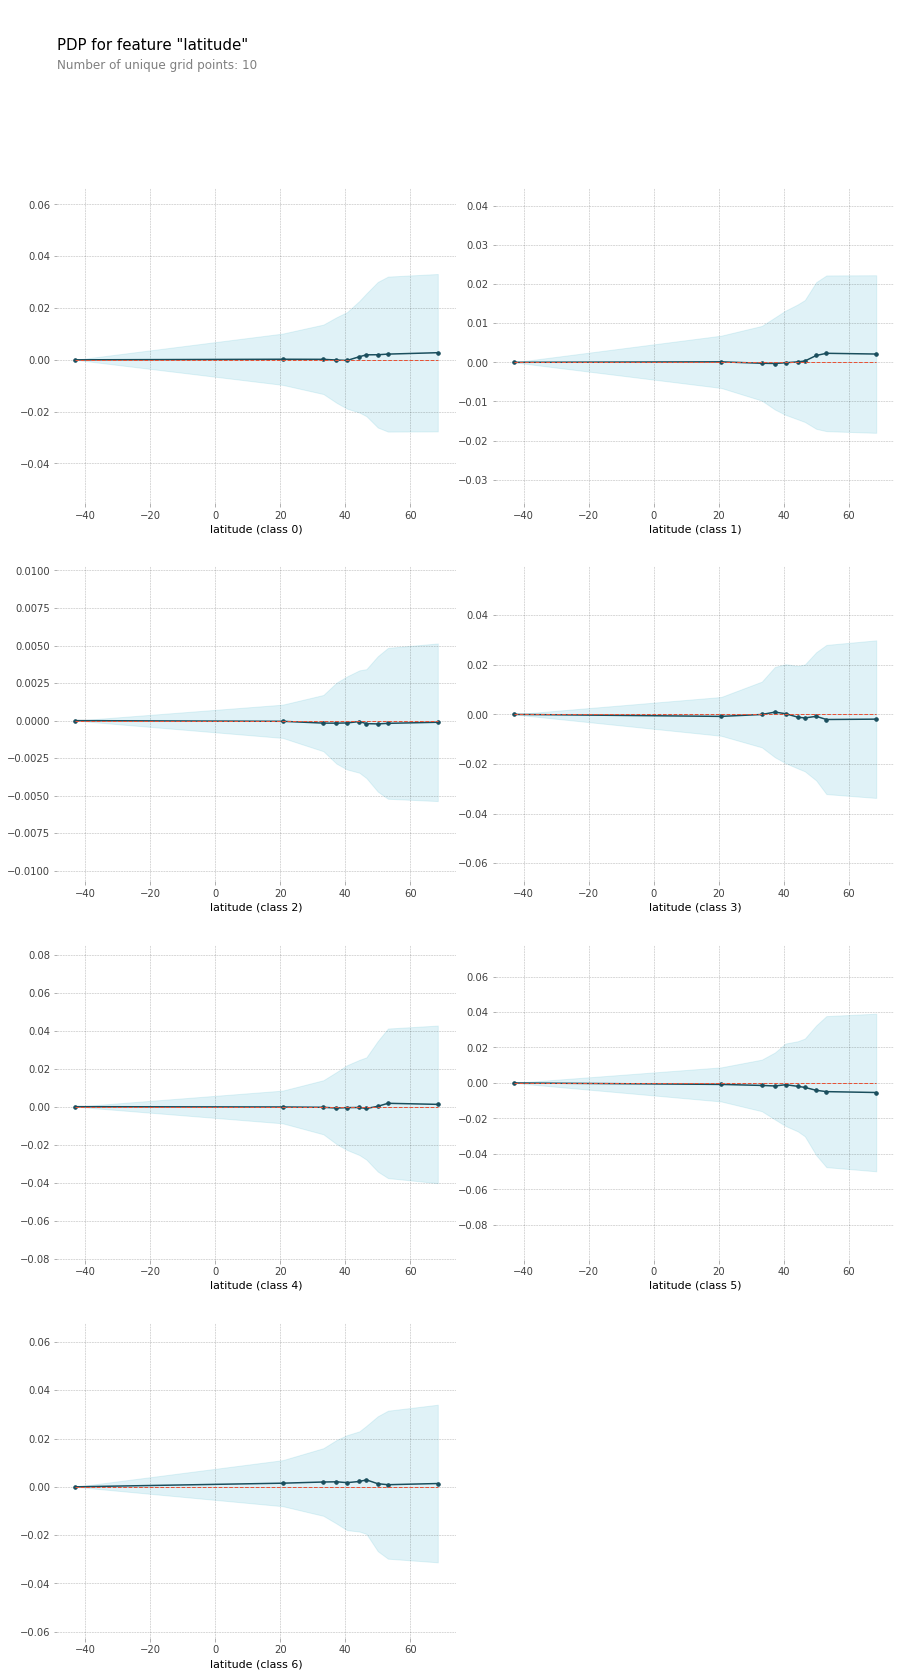

In [0]:
# PDP PLOT Using Pdpbox
!pip install Pdpbox

%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'latitude'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

In [0]:
# SHAPLEY VALUES FORCE PLOT
!pip install shap
import shap

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # For classification, this shows predicted probabilities
)

     |████████████████████████████████| 276kB 4.7MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394155 sha256=4fddfb59db1744068690b270cd82ae8d96663fb5f59510569fada59c69048a43
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


NameError: ignored